<a href="https://colab.research.google.com/github/Eieiz007/Deep-learning/blob/main/multihead_attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

In [23]:
sequence_length = 4 # 4 token
batch_size = 1 # batch 1
input_dim = 512 # embedding
d_model = 512 #dim output
x = torch.randn( (batch_size, sequence_length, input_dim) )

In [24]:
print(x.size())
x

torch.Size([1, 4, 512])


tensor([[[-0.1363, -0.1448, -0.7345,  ..., -1.0832,  0.2666,  1.1353],
         [-1.9599,  0.3104, -0.5402,  ..., -0.3175,  0.4157,  0.5326],
         [ 0.9200,  1.5564, -0.0078,  ..., -0.0751,  0.5364,  0.6340],
         [ 0.2829,  2.3576,  0.7772,  ..., -1.0690, -1.8149,  1.0452]]])

In [25]:
qkv_layer = nn.Linear(input_dim , 3 * d_model) #projection
qkv_layer

Linear(in_features=512, out_features=1536, bias=True)

In [26]:
qkv = qkv_layer(x)
qkv.size()

torch.Size([1, 4, 1536])

Text(0.5, 1.0, 'qkv distribution')

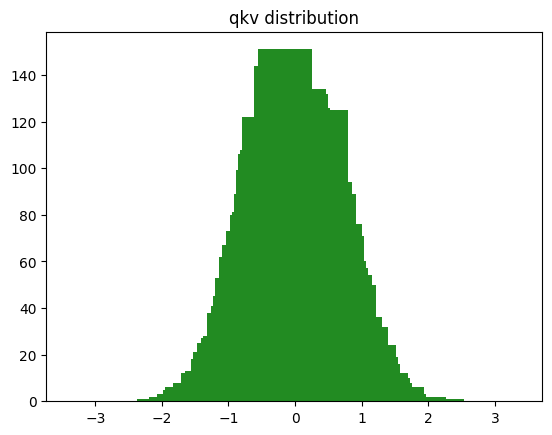

In [27]:
import matplotlib.pyplot as plt
y_val = torch.histc(qkv, bins=200, min=-3, max=3)
x_val = np.arange(-1, 1, 0.01) * 3
plt.bar(x_val, y_val, align='center', color=['forestgreen'])
plt.title('qkv distribution')


# New

In [42]:
batch_size = 1
sequence_length = 4
input_dim = 512  # ขนาดของอินพุต
d_model = 512    # ขนาดของ Q, K, V
num_heads = 8    # จำนวนหัว


In [43]:
x = torch.randn(batch_size, sequence_length, input_dim)
x

tensor([[[-0.6960,  2.2020,  1.7734,  ..., -1.3430, -1.2760, -1.2187],
         [-0.7034, -0.4712, -1.2370,  ...,  0.8138, -1.2921,  0.7877],
         [ 0.9905,  1.4021, -0.1326,  ...,  0.5913,  1.2743, -1.2694],
         [ 0.2573, -0.1161, -0.0325,  ...,  1.5817, -0.7497,  1.4181]]])

In [44]:

# Linear Layer เปลี่ยน 512 → 1536 (รวม Q, K, V)
linear_layer = nn.Linear(input_dim, 3 * d_model)
qkv = linear_layer(x)  # (batch_size, sequence_length, 1536)

In [45]:
qkv.size()

torch.Size([1, 4, 1536])

In [46]:
# แยก Q, K, V ออกจากกัน
q, k, v = torch.chunk(qkv, 3, dim=-1)  # แต่ละตัวขนาด (batch_size, sequence_length, 512)

In [48]:
q.size() , k.size() , v.size()

(torch.Size([1, 4, 512]), torch.Size([1, 4, 512]), torch.Size([1, 4, 512]))

In [49]:
head_dim = d_model // num_heads  # ขนาดของแต่ละหัว (64)

In [50]:
# Reshape เป็น Multi-Head Attention (batch_size, sequence_length, num_heads, head_dim)
q = q.view(batch_size, sequence_length, num_heads, head_dim)
k = k.view(batch_size, sequence_length, num_heads, head_dim)
v = v.view(batch_size, sequence_length, num_heads, head_dim)

In [52]:
# เปลี่ยนตำแหน่ง Dimension เป็น (batch_size, num_heads, sequence_length, head_dim)
q = q.transpose(1, 2)
k = k.transpose(1, 2)
v = v.transpose(1, 2)

# ตรวจสอบขนาด
print("Q shape:", q.shape)  # (batch_size, num_heads, sequence_length, head_dim)
print("K shape:", k.shape)  # (batch_size, num_heads, sequence_length, head_dim)
print("V shape:", v.shape)  # (batch_size, num_heads, sequence_length, head_dim)

Q shape: torch.Size([1, 8, 4, 64])
K shape: torch.Size([1, 8, 4, 64])
V shape: torch.Size([1, 8, 4, 64])
